Lab04_Exercises

1-Import Library

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [35]:
df = pd.read_csv('study_hours_grades_lab.csv')

In [36]:
df.head(10)

,StudyHours,Grade
0,15,100.0
1,14,93.3
2,15,100.0
3,3,46.9
4,13,90.5
5,3,54.2
6,7,63.7
7,2,50.2
8,4,43.6
9,11,90.9


In [37]:
df.head()

,StudyHours,Grade
0,15,100.0
1,14,93.3
2,15,100.0
3,3,46.9
4,13,90.5


In [38]:
df

,StudyHours,Grade
0,15,100.0
1,14,93.3
2,15,100.0
3,3,46.9
4,13,90.5
...,...,...
115,10,80.4
116,3,64.8
117,4,50.2
118,12,100.0


Two variables StudyHours and Grade

2-Scatter Graph

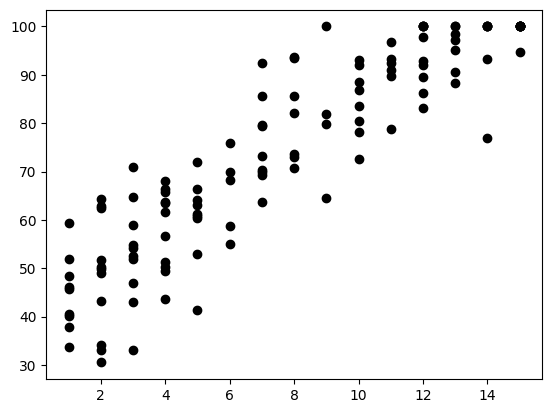

In [39]:
plt.scatter(df['StudyHours'], df['Grade'], color = 'black')

Text(0.5, 1.0, 'Study Hours Vs Grades')

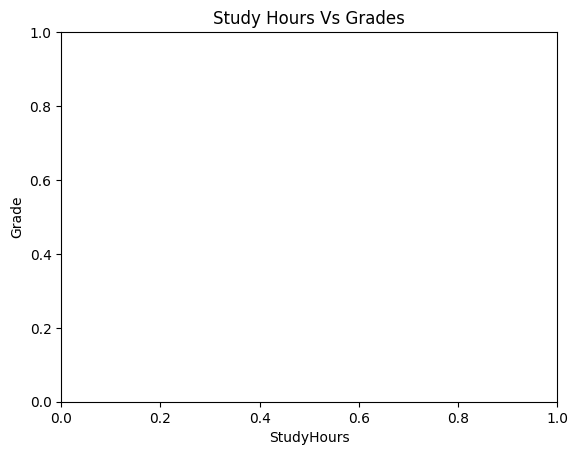

In [40]:
plt.xlabel('StudyHours')
plt.ylabel('Grade')
plt.title('Study Hours Vs Grades')

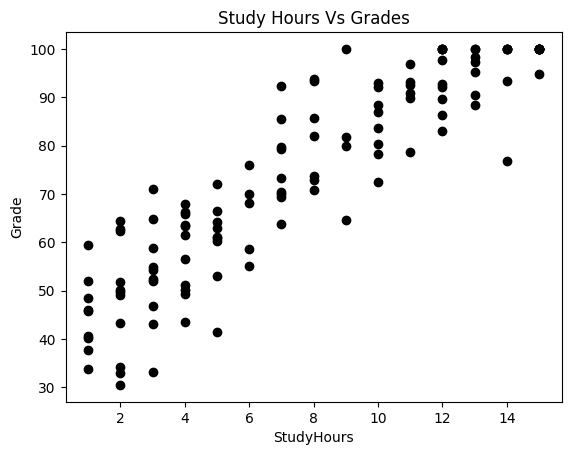

In [41]:
plt.scatter(df['StudyHours'], df['Grade'], color = 'black')
plt.xlabel('StudyHours')
plt.ylabel('Grade')
plt.title('Study Hours Vs Grades')
plt.show()

Split data 75 per cent training and 25 percent testing

In [42]:
df

,StudyHours,Grade
0,15,100.0
1,14,93.3
2,15,100.0
3,3,46.9
4,13,90.5
...,...,...
115,10,80.4
116,3,64.8
117,4,50.2
118,12,100.0


In [50]:
x = df[['StudyHours']]
y = df['Grade']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

In [52]:
print(f'Training size: {len(x_train)}')

Training size: 90


In [53]:
print(f'Testing size: {len(x_test)}')

Testing size: 30


3-Fit

In [54]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


intercept and slope

In [57]:
intercept = regressor.intercept_
slope = regressor.coef_[0]

In [58]:
print(f'Model Slope: {slope}')
print(f'Model intercept: {intercept}')

Model Slope: 4.2417515143704065
Model intercept: 41.46696094857585


Regression Equation

In [60]:
print(f'Regression equation: Grade = {intercept:.2f} + {slope:.2f} * StudyHours')

Regression equation: Grade = 41.47 + 4.24 * StudyHours


Use the model to predict the grade of a student who studied: a. 5 hours b. 10 hours c. 15 hours

In [63]:
hours = pd.DataFrame({'StudyHours': [5, 10, 15]})
predictions = regressor.predict(hours)

In [65]:
hours = [5, 10, 15]
predictions = regressor.predict(pd.DataFrame({'StudyHours': hours}))

for i, h in enumerate(hours):
    print(f'Predicted grade for {h} hours of study = {predictions[i]:.2f}')

Predicted grade for 5 hours of study = 62.68
Predicted grade for 10 hours of study = 83.88
Predicted grade for 15 hours of study = 105.09


Does the line fit the data well?

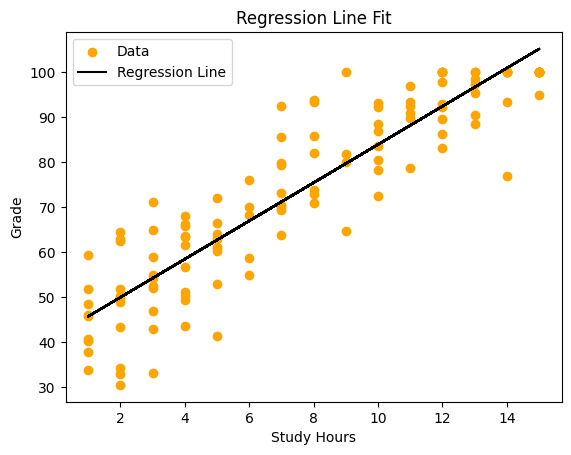

In [67]:
plt.scatter(df['StudyHours'], df['Grade'], color = 'orange', label = 'Data')
plt.plot(df['StudyHours'], regressor.predict(df[['StudyHours']]), color = 'black', label = 'Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Grade')
plt.title('Regression Line Fit')
plt.legend()
plt.show()

R2 score

In [68]:
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')

R2 Score: 0.8047215861455171


In [69]:
if slope > 0:
    print('Conclusion: Yes, studying more hours generally leads to higher grades')
else:
    print('Conclusion: No, study hours do not affect grades')

Conclusion: Yes, studying more hours generally leads to higher grades
